<a href="https://colab.research.google.com/github/zwarshavsky/DS-Unit-1-Sprint-3-Statistical-Tests-and-Experiments/blob/master/module2-sampling-confidence-intervals-and-hypothesis-testing/Zhenya_Warshavsky_LS_DS_132_Sampling_Confidence_Intervals_and_Hypothesis_Testing_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment - Build a confidence interval

A confidence interval refers to a neighborhood around some point estimate, the size of which is determined by the desired p-value. For instance, we might say that 52% of Americans prefer tacos to burritos, with a 95% confidence interval of +/- 5%.

52% (0.52) is the point estimate, and +/- 5% (the interval $[0.47, 0.57]$) is the confidence interval. "95% confidence" means a p-value $\leq 1 - 0.95 = 0.05$.

In this case, the confidence interval includes $0.5$ - which is the natural null hypothesis (that half of Americans prefer tacos and half burritos, thus there is no clear favorite). So in this case, we could use the confidence interval to report that we've failed to reject the null hypothesis.

But providing the full analysis with a confidence interval, including a graphical representation of it, can be a helpful and powerful way to tell your story. Done well, it is also more intuitive to a layperson than simply saying "fail to reject the null hypothesis" - it shows that in fact the data does *not* give a single clear result (the point estimate) but a whole range of possibilities.

How is a confidence interval built, and how should it be interpreted? It does *not* mean that 95% of the data lies in that interval - instead, the frequentist interpretation is "if we were to repeat this experiment 100 times, we would expect the average result to lie in this interval ~95 times."

For a 95% confidence interval and a normal(-ish) distribution, you can simply remember that +/-2 standard deviations contains 95% of the probability mass, and so the 95% confidence interval based on a given sample is centered at the mean (point estimate) and has a range of +/- 2 (or technically 1.96) standard deviations.

Different distributions/assumptions (90% confidence, 99% confidence) will require different math, but the overall process and interpretation (with a frequentist approach) will be the same.

Your assignment - using the data from the prior module ([congressional voting records](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records)):


### Confidence Intervals:
1. Generate and numerically represent a confidence interval
2. Graphically (with a plot) represent the confidence interval
3. Interpret the confidence interval - what does it tell you about the data and its distribution?

### Chi-squared tests:
4. Take a dataset that we have used in the past in class that has **categorical** variables. Pick two of those categorical variables and run a chi-squared tests on that data
  - By hand using Numpy
  - In a single line using Scipy


In [1]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data

--2019-09-17 20:01:23--  https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18171 (18K) [application/x-httpd-php]
Saving to: ‘house-votes-84.data’

house-votes-84.data 100%[===================>]  17.75K  --.-KB/s    in 0.04s   

2019-09-17 20:01:23 (463 KB/s) - ‘house-votes-84.data’ saved [18171/18171]



In [0]:
import pandas as pd
import numpy as np


df = pd.read_csv('house-votes-84.data',
               header=None,
               names=['party','handicapped-infants','water-project',
                        'budget','physician-fee-freeze', 'el-salvador-aid',
                        'religious-groups','anti-satellite-ban',
                        'aid-to-contras','mx-missile','immigration',
                        'synfuels', 'education', 'right-to-sue','crime','duty-free',
                        'south-africa'])

df = df.replace({'?':np.NaN, 'n':0, 'y':1})

In [0]:
def h(dataframe,*args):
    #returns head() of a dataframe. has an optional argument for row number. 
    return display(dataframe.head(*args),dataframe.shape)

In [9]:
h(df)

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
2,democrat,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0


(435, 17)

###1. Generate and numerical represent a confidence interval

52% (0.52) is the point estimate, and +/- 5% (the interval $[0.47, 0.57]$) is the confidence interval. "95% confidence" means a p-value $\leq 1 - 0.95 = 0.05$.

In this case, the confidence interval includes $0.5$ - which is the natural null hypothesis (that half of Americans prefer tacos and half burritos, thus there is no clear favorite). So in this case, we could use the confidence interval to report that we've failed to reject the null hypothesis.

But providing the full analysis with a confidence interval, including a graphical representation of it, can be a helpful and powerful way to tell your story. Done well, it is also more intuitive to a layperson than simply saying "fail to reject the null hypothesis" - it shows that in fact the data does *not* give a single clear result (the point estimate) but a whole range of possibilities.

How is a confidence interval built, and how should it be interpreted? It does *not* mean that 95% of the data lies in that interval - instead, the frequentist interpretation is "if we were to repeat this experiment 100 times, we would expect the average result to lie in this interval ~95 times."

For a 95% confidence interval and a normal(-ish) distribution, you can simply remember that +/-2 standard deviations contains 95% of the probability mass, and so the 95% confidence interval based on a given sample is centered at the mean (point estimate) and has a range of +/- 2 (or technically 1.96) standard deviations.

Different distributions/assumptions (90% confidence, 99% confidence) will require different math, but the overall process and interpretation (with a frequentist approach) will be the same.

In [156]:
import scipy.stats as stats

def confidence_interval(data, confidence=0.95):
  """
  Calculate a confidence interval around a sample mean for given data.
  Using t-distribution and two-tailed test, default 95% confidence. 
  
  Arguments:
    data - iterable (list or numpy array) of sample observations
    confidence - level of confidence for the interval
  
  Returns:
    tuple of (mean, lower bound, upper bound)
  """
  data = np.array(data)
  mean = np.mean(data)
  n = len(data)
  # stderr = stats.sem(data)
  stderr = np.std(data, ddof=1) / np.sqrt(n)
  margin_of_error = stderr * stats.t.ppf((1 + confidence) / 2.0, n - 1)
#   print(margin_of_error)
  return (margin_of_error,mean, mean - margin_of_error, mean + margin_of_error)


# confidence_interval(df[df["party"] == "republican"]["religious-groups"])

# confidence_interval([1,2])


data = df[df["party"] == "republican"]["religious-groups"].dropna()
confidence_interval(data)


(0.046602875442389065,
 0.8975903614457831,
 0.850987486003394,
 0.9441932368881721)

In [0]:
def df_p(df):
    global d_repub
    global d_demo
    d_repub = {}
    d_demo = {}
    for column in df:
        if df[column].dtypes == 'O':
            continue
        else:
            d_repub.update({ column: df.loc[df["party"]=="republican"][column].dropna() })
            d_demo.update({ column: df.loc[df["party"]=="democrat"][column].dropna() })
    
df_p(df)

In [158]:
for key,value in d_repub.items():
    print(key)
    

handicapped-infants
water-project
budget
physician-fee-freeze
el-salvador-aid
religious-groups
anti-satellite-ban
aid-to-contras
mx-missile
immigration
synfuels
education
right-to-sue
crime
duty-free
south-africa


In [210]:
repubs = df.loc[df["party"]=="republican"].drop(["party"],axis=1).dropna() 
democrats = df.loc[df["party"]=="democrat"].drop(["party"],axis=1).dropna() 

h(repubs),h(democrats)

,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
8,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
28,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
30,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
33,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
35,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0


(108, 16)

,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
5,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
19,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
23,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
25,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
26,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0


(124, 16)

(None, None)

In [0]:
r_confs = {}
for column in repubs:
    r_confs.update ({ column : confidence_interval(repubs[column]) })

In [0]:
d_confs = {}
for column in democrats:
    d_confs.update ({ column : confidence_interval(democrats[column]) })

In [162]:
for key,value in confs.items():
    print(key,value)

handicapped-infants (0.07845947221338075, 0.21296296296296297, 0.13450349074958223, 0.2914224351763437)
water-project (0.0956741290450303, 0.4722222222222222, 0.3765480931771919, 0.5678963512672525)
budget (0.06979385041928564, 0.1574074074074074, 0.08761355698812177, 0.22720125782669304)
physician-fee-freeze (0.018355401575213124, 0.9907407407407407, 0.9723853391655276, 1.009096142315954)
el-salvador-aid (0.04026944239296074, 0.9537037037037037, 0.913434261310743, 0.9939731460966644)
religious-groups (0.06437243629631205, 0.8703703703703703, 0.8059979340740583, 0.9347428066666824)
anti-satellite-ban (0.08493458049691421, 0.26851851851851855, 0.18358393802160433, 0.35345309901543276)
aid-to-contras (0.06808099690983528, 0.14814814814814814, 0.08006715123831286, 0.2162291450579834)
mx-missile (0.06627642974462877, 0.1388888888888889, 0.07261245914426012, 0.20516531863351767)
immigration (0.09476473709513043, 0.5740740740740741, 0.4793093369789436, 0.6688388111692045)
synfuels (0.0697938

###2. Graphically (with a plot) represent the confidence interval

0.046602875442389065


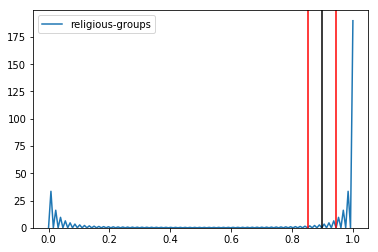

In [131]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.kdeplot(data)
CI = confidence_interval(data)
plt.axvline(x=CI[1], color='red')
plt.axvline(x=CI[2], color='red')
plt.axvline(x=CI[0], color='k');



plt.show()

<Figure size 432x288 with 0 Axes>

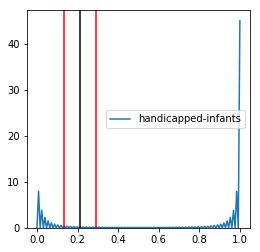

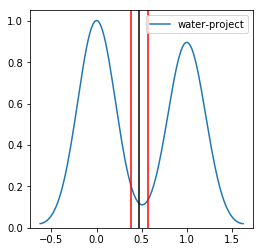

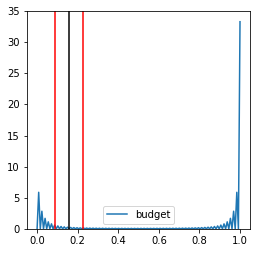

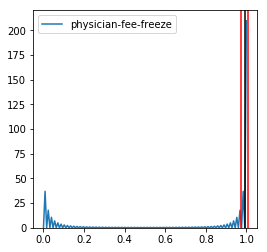

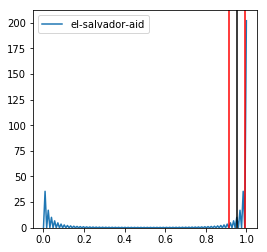

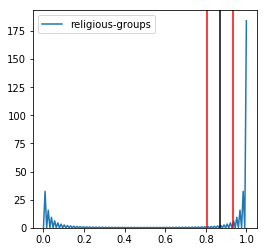

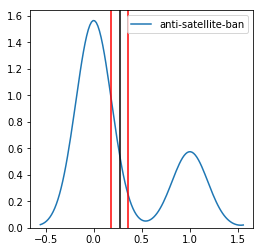

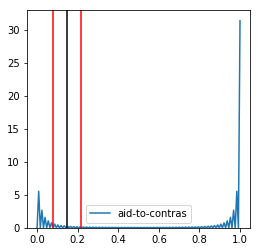

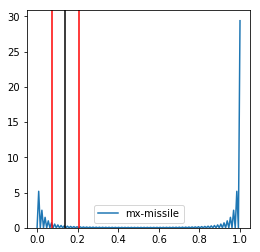

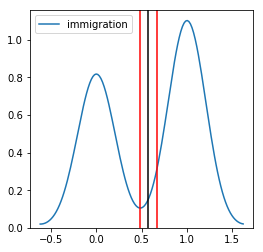

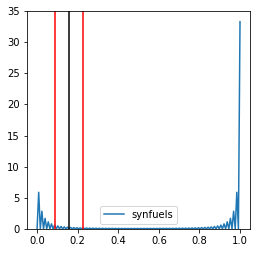

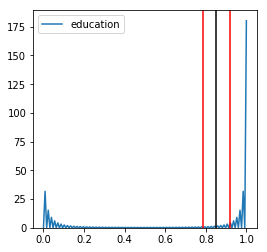

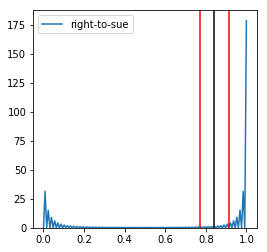

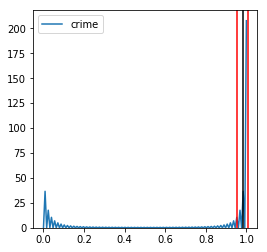

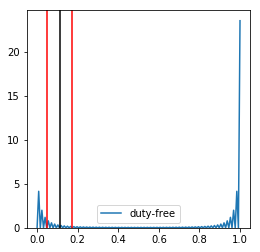

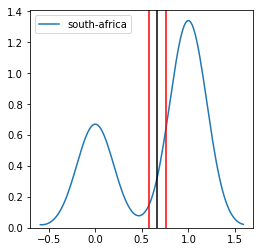

In [163]:
#Confidence Intervals for Republican Voting for All Bills 

fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for key,value in repubs.items():
    fig, ax = plt.subplots(figsize=(4,4))
    sns.kdeplot(value)
    CI = confidence_interval(value)
    plt.axvline(x=CI[2], color='red')
    plt.axvline(x=CI[3], color='red')
    plt.axvline(x=CI[1], color='k');

<Figure size 432x288 with 0 Axes>

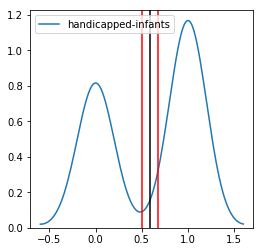

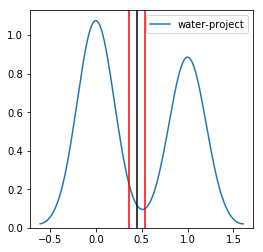

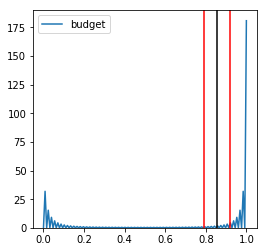

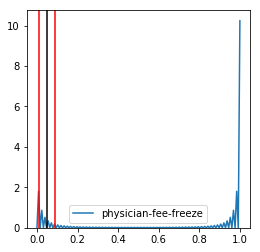

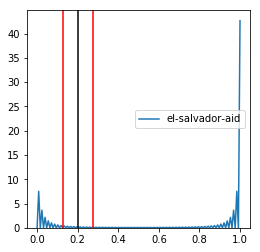

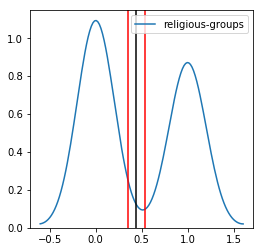

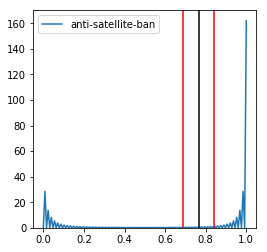

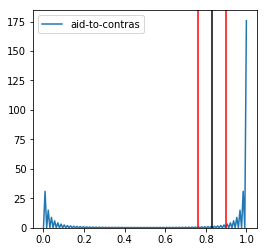

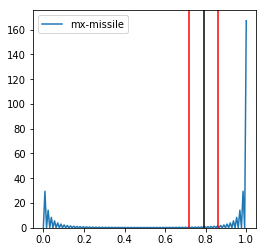

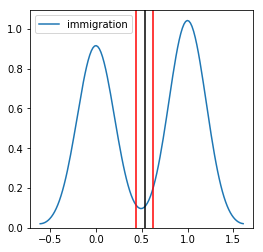

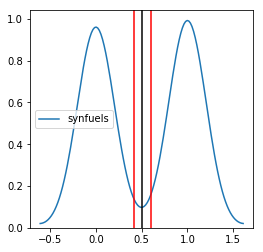

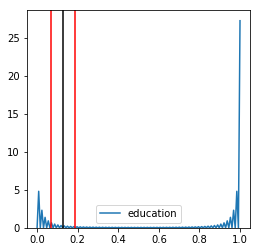

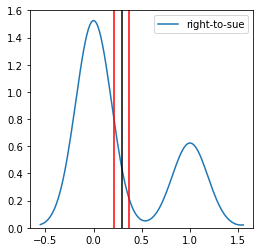

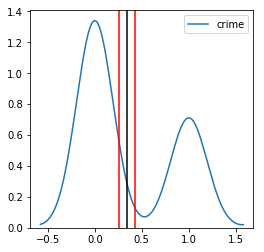

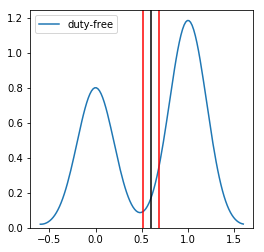

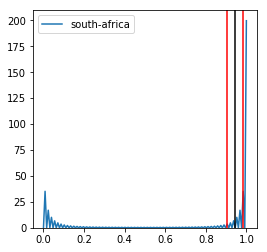

In [164]:
#Confidence Intervals for Democrat Voting for All Bills 

fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for key,value in democrats.items():
    fig, ax = plt.subplots(figsize=(4,4))
    sns.kdeplot(value)
    CI = confidence_interval(value)
    plt.axvline(x=CI[2], color='red')
    plt.axvline(x=CI[3], color='red')
    plt.axvline(x=CI[1], color='k');

In [0]:
def var(n):
    #function for variance
    l = []
    m = sum(n) / len(n)
    for i in n:
        l.append((i - m) ** 2)
    return sum(l)/len(l)

In [207]:
r_conf_list = []
d_conf_list = []
for key,value in r_confs.items():
    r_conf_list.append(value[1])

for key,value in d_confs.items():
    d_conf_list.append(value[1])

print(var(r_conf_list),var(d_conf_list))

0.11606994545181756 0.068906087408949


###3. Interpret Confidence Interval

A. By looking at the confidence intervals between the two parties, I observed that the democrats appeared to have more bivariation than the republicans aka tended to vote more diversely. I am stumbled, however, because after performing a variance on the margin of error for both parties, it appears that there is noticeably more variable on the republican side, although it is very low. Thinking of other tests to perform to compare the results between the two parties voting tendencies.  

###4. Chi-squared analysis

Take a dataset that we have used in the past in class that has **categorical** variables. Pick two of those categorical variables and run a chi-squared tests on that data
  - By hand using Numpy
  - In a single line using Scipy

In [206]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data

--2019-09-17 22:45:06--  https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4551 (4.4K) [application/x-httpd-php]
Saving to: ‘iris.data’

iris.data           100%[===================>]   4.44K  --.-KB/s    in 0s      

2019-09-17 22:45:06 (142 MB/s) - ‘iris.data’ saved [4551/4551]



## Stretch goals:

1. Write a summary of your findings, mixing prose and math/code/results. *Note* - yes, this is by definition a political topic. It is challenging but important to keep your writing voice *neutral* and stick to the facts of the data. Data science often involves considering controversial issues, so it's important to be sensitive about them (especially if you want to publish).
2. Apply the techniques you learned today to your project data or other data of your choice, and write/discuss your findings here.
3. Refactor your code so it is elegant, readable, and can be easily run for all issues.

## Resources

- [Interactive visualize the Chi-Squared test](https://homepage.divms.uiowa.edu/~mbognar/applets/chisq.html)
- [Calculation of Chi-Squared test statistic](https://en.wikipedia.org/wiki/Pearson%27s_chi-squared_test)
- [Visualization of a confidence interval generated by R code](https://commons.wikimedia.org/wiki/File:Confidence-interval.svg)
- [Expected value of a squared standard normal](https://math.stackexchange.com/questions/264061/expected-value-calculation-for-squared-normal-distribution) (it's 1 - which is why the expected value of a Chi-Squared with $n$ degrees of freedom is $n$, as it's the sum of $n$ squared standard normals)